<a href="https://colab.research.google.com/github/Santiago-Quinteros/Rigid-registration-of-brain-images/blob/main/Rigid_Registration_brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UE Patient Numérique - TP I.2 | Recalage rigide d'images cérébrales

francois.rousseau@imt-atlantique.fr, pierre-henri.conze@imt-atlantique.fr

---


L'objectif de ce TP est d'implémenter et d'étudier un algorithme de recalage d'images 2D, appliqué à des données IRM cérébrales.

Au préalable, importons dans l'espace de stockage de la session Colab les images IRM T1 et T2 fournies (`T1.png`, `T2.png`).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage.transform import rotate
from skimage.metrics import mean_squared_error
from skimage import data, color


angle = 30
refimage = io.imread('./T1.png', as_gray=True)
movimage = rotate(refimage, angle, resize=False, center=None, order=3)

#### **Question 1** - Visualiser l'image T1 et sa version avec rotation à l'aide de la fonction `imshow` de `matplotlib`. Il peut être également intéressant de superposer les images pour étudier la qualité du recalage (en modifiant l'option `alpha` dans la fonction `imshow`).

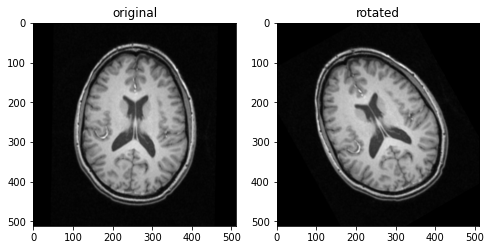

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("original")
ax[0].imshow(refimage, cmap='gray') # A COMPLETER
ax[1].set_title("rotated")
ax[1].imshow(movimage, cmap='gray') # A COMPLETER
plt.show()

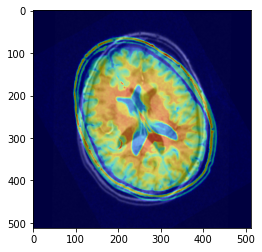

In [ ]:
plt.imshow(refimage, cmap='gray') # A COMPLETER
plt.imshow(movimage, alpha = .5, cmap='jet') # A COMPLETER
plt.show()

#### **Question 2** - Ecrire une fonction permettant d'appliquer une rotation sur l'image à recaler (on utilisera pour cela la fonction `rotate` de `skimage`).

In [ ]:
def warp_image(ima , ang ): # FONCTION A COMPLETER
  rotImage=rotate(ima,ang)
  return rotImage

#### **Question 3** - Ecrire une fonction permettant de calculer l'erreur moyenne quadratique entre l'image de référence et l'image transformée.

In [ ]:
def mse(image0 ,image1 ): # FONCTION A COMPLETER
  error=mean_squared_error(image0, image1)
  return error

#### **Question 4** - Ecrire la fonction de coût $f$, prenant en argument $x$ (la valeur du paramètre de rotation courant) et *data* (un container permettant d'accéder aux données).

In [ ]:
class container(object):
  pass

c = container()
c.reference = refimage
c.moving = movimage
#container avec l'image original (Iref) et l'image rote (Irec)
#x=u
#data est le container
def f(x,data):
  h=warp_image(data.moving , x )
  cout=mse(h,data.reference)
  return cout # A COMPLETER

#### **Question 5** - Afficher la valeur de la fonction de coût en fonction de l'angle de rotation appliqué.

Text(0.5, 1.0, 'msc=f(angle)')

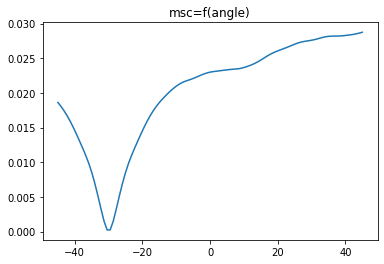

In [ ]:
angle_range = np.linspace(-45,45,100)
error_array=[]
for i in angle_range:
  error=mse(refimage, warp_image(movimage ,i))
  error_array.append(error)

plt.plot(angle_range,error_array)

plt.title("msc=f(angle)")
# A COMPLETER

#### **Question 6** - Etudier la fonction de coût lorsque les images sont lissées (à l'aide de la fonction `gaussian_filter` de `scipy`).

Text(0.5, 1.0, 'msc=f(angle)')

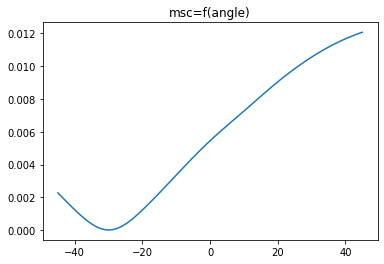

In [ ]:
from scipy.ndimage import gaussian_filter

angle_range = np.linspace(-45,45,100)
error_array=[]
for i in angle_range:
  error=mse(gaussian_filter(refimage,10),gaussian_filter(warp_image(movimage ,i),10))
  error_array.append(error)

plt.plot(angle_range,error_array)

plt.title("msc=f(angle)")
# A COMPLETER
#on peut voire que maintenant il ne semble pas davoire un minimum local, la convergence sera plus vite

#### **Question 7** - Ecrire l'optimisation de cette fonction de coût (à l'aide de la fonction `minimize` de `scipy`), étudier l'influence du choix de l'initialisation du paramètre de rotation et vérifier les résultats estimées en superposant les images.

         Current function value: 0.000028
         Iterations: 2
         Function evaluations: 54
         Gradient evaluations: 27
[-29.99491061]


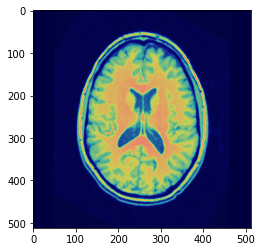

In [ ]:
from scipy.optimize import minimize

x = 10

res = minimize(f, x, args=(c), method= "CG", options={'maxiter': 2, 'disp':True}) # A COMPLETER

print(res.x)

plt.imshow(refimage, cmap='gray')
plt.imshow(rotate(movimage, res.x, resize=False, center=None, order=3), alpha = 0.5, cmap='jet')
plt.show()

#si on commence avec x=10 dans la premiere iteration l'angle est 10, dans la deuxieme 6, dans le troisieme -29.99 (c'est suffisant)
#si on change x il arrive plus vite a la convergence quand plus proche de -30 (on peut regarder que c'est l'angle que minimise l'erreur dans les parties 5 et 6)

#### **Question 8** - Considérer maintenant des images de modalités différentes. Etudier la fonction de coût définie précédemment.

Text(0.5, 1.0, 'msc=f(angle)')

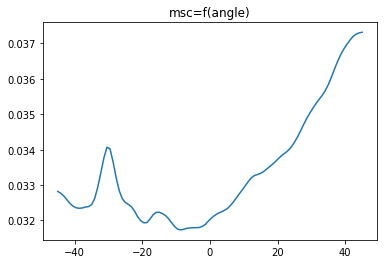

In [ ]:
movimage = rotate(io.imread('./T2.png', as_gray=True), angle, resize=False, center=None, order=3)

c2 = container()
c2.reference = refimage
c2.moving = movimage

angle_range = np.linspace(-45,45,100)
error_array=[]
for i in angle_range:
  error=mse(refimage, warp_image(movimage ,i))
  error_array.append(error)

plt.plot(angle_range,error_array)

plt.title("msc=f(angle)")
# A COMPLETER


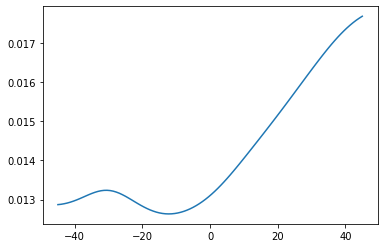

In [ ]:

angle_range = np.linspace(-45,45,100)
error_array=[]
for i in angle_range:
  error=mse(gaussian_filter(refimage,10),gaussian_filter(warp_image(movimage ,i),10))
  error_array.append(error)

plt.plot(angle_range,error_array)



Optimization terminated successfully.
         Current function value: 0.031796
         Iterations: 3
         Function evaluations: 78
         Gradient evaluations: 39
[-4.16951696]


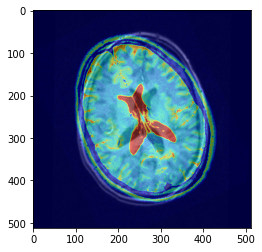

In [ ]:
res = minimize(f, x, args=(c2), method= "CG", options={'maxiter': 100, 'disp':True}) # A COMPLETER

print(res.x)

plt.imshow(refimage, cmap='gray')
plt.imshow(rotate(movimage, res.x, resize=False, center=None, order=3), alpha = 0.5, cmap='jet')
plt.show()

# A COMPLETER

#### **Question 9** - Calculer l'histogramme joint (à l'aide de la fonction `histogram2d` de `numpy`) et l'afficher.

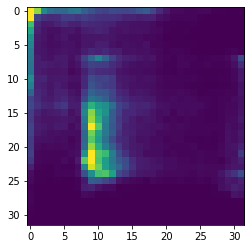

In [ ]:
nbins = 32
bins = (nbins, nbins)

jh = np.histogram2d(refimage.flatten(), movimage.flatten(), bins=bins)[0] # Flatten converts one matriz in one array

plt.imshow(jh/np.sum(jh),vmin=0,vmax=0.005)
plt.show()

#### **Question 10** - Ecrire une fonction pour calculer l'information mutuelle entre deux images dont la définition est: $$I(X;Y) = \sum_{x,y} P(x,y) \log \frac{P(x,y)}{P(x)P(y)}$$.

In [ ]:
def mi(reference,moving): # FONCTION A COMPLETER
  jh = np.histogram2d(reference.flatten(), moving.flatten(), bins=bins)[0] # A COMPLETER
  jh = jh + np.finfo(float).eps # évite de gérer les zeros dans jh

  # A COMPLETER


  PX=np.sum(jh,axis=0)/np.sum(jh)
  PY=np.sum(jh,axis=1)/np.sum(jh)
  PXY=jh/np.sum(jh)
  mi = np.sum(PXY*np.log(PXY/(PX*PY))) # A COMPLETER
  return mi

print(mi(refimage,movimage)) # A COMPLETER

0.6239953160172966


#### **Question 11** - Modifier la fonction de coût associée au problème de recalage en utilisant l'information mutuelle et afficher l'évolution de l'information mutuelle en fonction de l'angle de rotation, ainsi que les histogrammes joints.

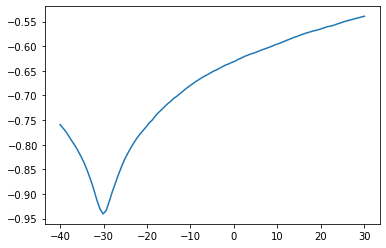

In [ ]:
# A COMPLETER

def f2(x,data):
  h=warp_image(data.moving , x )
  cout=mi(data.reference,h)
  return -cout

angle_range = np.linspace(-40,30,100)
error_array=[]
for i in angle_range:
  error = f2(i,c2)
  error_array.append(error)

plt.plot(angle_range,error_array)

#### **Question 12** - Ecrire l'étape d'optimisation avec pour de fonction de coût l'information mutuelle. Visualiser l'image recalée par rapport à l'image de référence et afficher le nouvel histogramme joint (après recalage).

Optimization terminated successfully.
         Current function value: 0.940611
         Iterations: 0
         Function evaluations: 2
         Gradient evaluations: 1


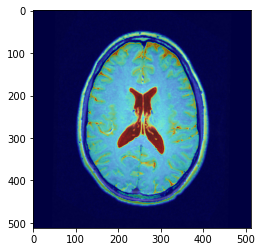

In [ ]:
# A COMPLETER
max = -30
res2 = minimize(f2, max, args=(c2), method= "CG", options={'maxiter': 100, 'disp':True}) # A COMPLETER


plt.imshow(refimage, cmap='gray')
rotatedim=rotate(movimage, res2.x, resize=False, center=None, order=3)
plt.imshow(rotate(movimage, res2.x, resize=False, center=None, order=3), alpha = 0.5, cmap='jet')
plt.show()

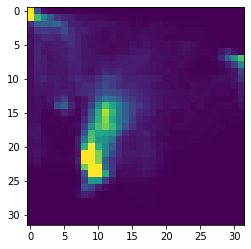

In [ ]:
nbins = 32
bins = (nbins, nbins)

jh = np.histogram2d(refimage.flatten(), rotatedim.flatten(), bins=bins)[0] # Flatten converts one matriz in one array

plt.imshow(jh/np.sum(jh),vmin=0,vmax=0.005)
plt.show()

#### **Question 13** - Etendre le code précédent pour gérer une transformation affine (à l'aide de la fonction `affine_transform` de `scipy`).

Optimization terminated successfully.
         Current function value: -0.623995
         Iterations: 0
         Function evaluations: 7
         Gradient evaluations: 1


RuntimeError: ignored

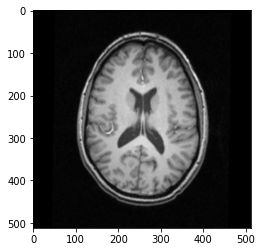

In [ ]:
from scipy.ndimage.interpolation import affine_transform

# A COMPLETER
def f3(x,data):
  x2 = np.append(x,[0,0,1])
  shape = x2.reshape(3,3)
  h=affine_transform(data.moving , shape)
  cout=mi(data.reference,h)
  return -cout

c3 = container()
c3.reference = refimage
c3.moving = movimage

x=np.array([1,0,0,0,1,0])
error_array=[]

res3 = minimize(f3, x, args=(c3), method= "CG", options={'maxiter': 2, 'disp':True})

plt.imshow(refimage, cmap='gray')

plt.imshow(affine_transform(movimage, res3.x), alpha = 0.5, cmap='jet')
plt.show()

In [ ]:
nbins = 32
bins = (nbins, nbins)

jh = np.histogram2d(refimage.flatten(), rotatedim.flatten(), bins=bins)[0] # Flatten converts one matriz in one array

plt.imshow(jh/np.sum(jh),vmin=0,vmax=0.005)
plt.show()